# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts



from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"

In [3]:
plots = "plots/"

# alle Literaturwerte betrachtet

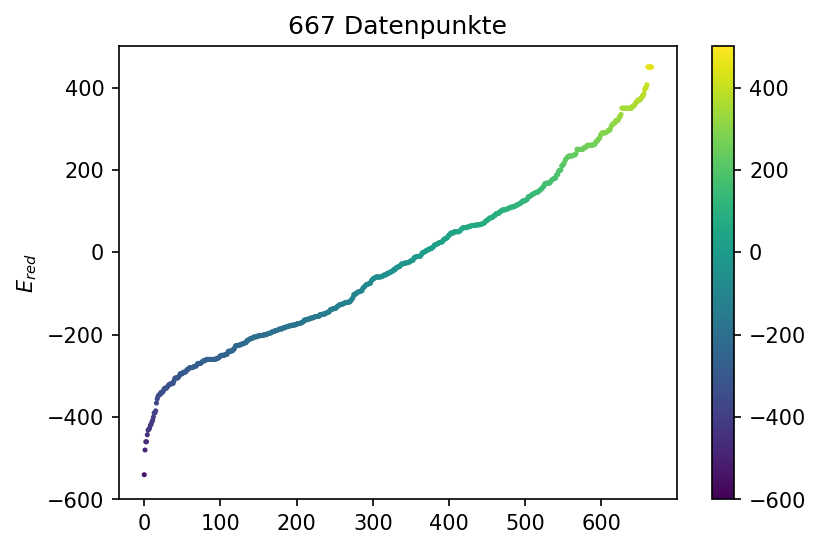

In [4]:
dff = pd.read_csv("tables/RedoxPotential.csv")
def f(strs):
    if type(strs) == str:
        try:
            return float(strs.split("+-")[0])
        except:
            return None
    elif(type(strs) == float):
        return float

plt.figure(dpi=150)

lis = [f(i) for i in dff['EM'] if type(f(i)) == float]
lis.sort()
plt.ylabel("$E_{red}$")
#plt.xlabel("order")
plt.scatter(range(len(lis)), lis,s =2,c=lis, vmin = -600, vmax = 500)
plt.ylim([-600,500])
plt.colorbar()

dff = pd.DataFrame({"Em_lit":lis})
plt.title(f"{len(lis)} Datenpunkte")
plt.savefig(f"{plots}order_large.png" )

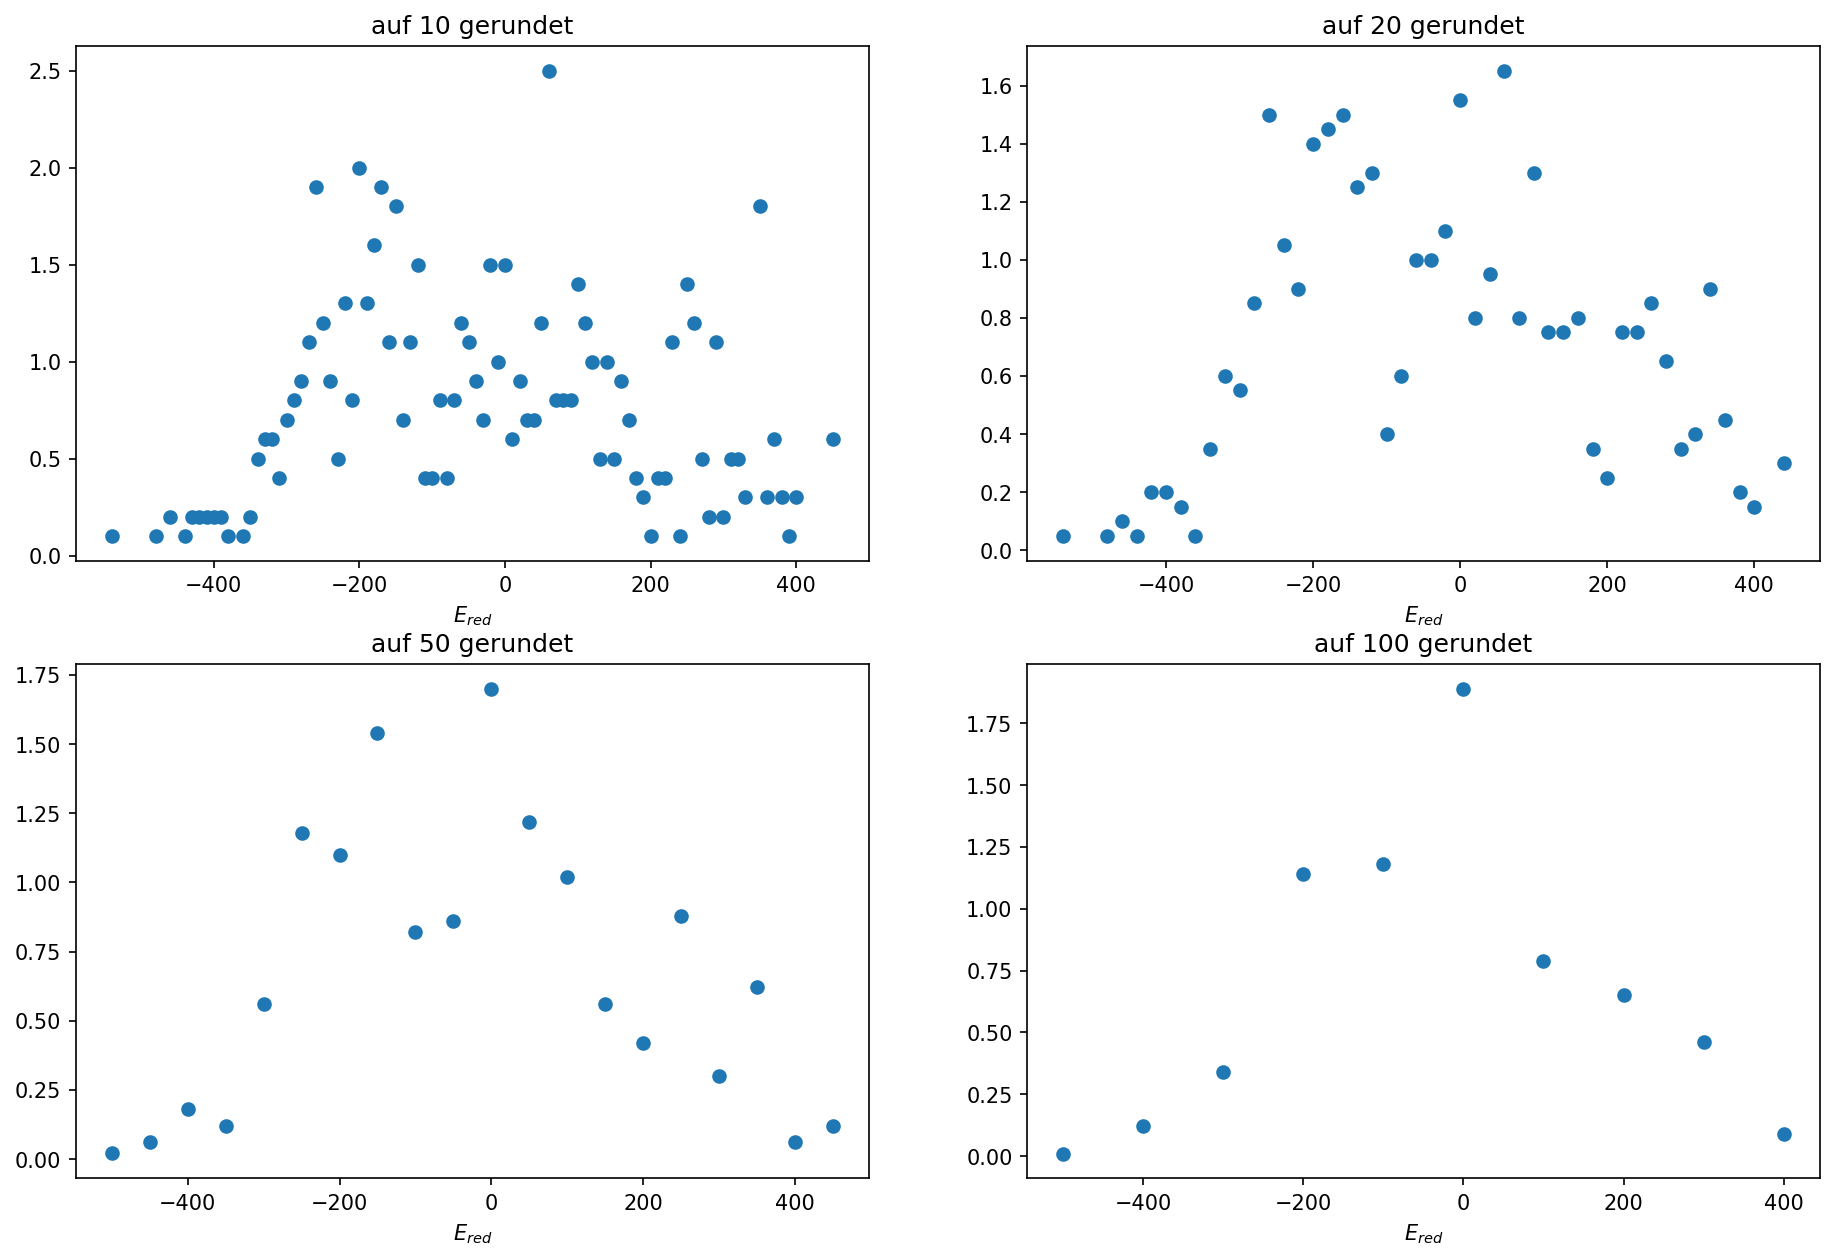

In [5]:
plt.figure(num=1,figsize=(15,10),dpi =150)

plt.subplot(2,2,1)
count = 10
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,2)
count = 20
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,3)
count = 50
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,4)
count = 100
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.savefig(f"{plots}gaussrm.png")

# erstelle die DataFrames

In [6]:
if(False):
    wts.TCL-Skript()
    wts.dihedpdb()        
    wts.prepare_gaussian_logs().core()
    wts.onecsv()

    wts.read_redpot_lit()

In [7]:
if(False):
    dfex_4.loc["2ce0"]
    dfex_lit.loc["2CE0"]

In [8]:
dfex_1 =pd.read_csv("tables/mono.csv")
dfex_1  =dfex_1.set_index("pdb")
dfex_1 = dfex_1[[ "Elektrode","Ligand","EMv"]]
dfex_3 = pd.read_csv("tables/duplicated_moded.csv")
dfex_4 = dfex_3.drop_duplicates("PDB", keep=False)
dfex_4= dfex_4.set_index("pdb")#.rename({"PDB":"pdb"})
dfex_4 = dfex_4[[ "Elektrode","Ligand","EMv"]]

dfex_lit = dfex_1.append(dfex_4)
dfex_lit.index = dfex_lit.index.str.upper()
dfex_lit =dfex_lit.rename(columns = {"EMv":"Em_lit"})
df_axlig = pd.read_csv("tables/axligand.csv")
df_axlig = df_axlig.rename(columns={"# PDB": "pdb","ligand" : "ligand_pydish"}).set_index("pdb")
df_axlig = df_axlig[["ligand_pydish","saddling","ruffling"]]

df_calc = pd.read_csv("tables/calculated.csv")
df_calc = df_calc.drop("Unnamed: 0", axis=1).set_index("pdb")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_dihedral = _dihedral.rename(columns={"Unnamed: 0":"PDB"})
_dihedral = _dihedral.set_index("PDB")

df_ruffling = pd.read_csv("tables/Ruffling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_saddling = pd.read_csv("tables/Saddling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_ruffling_all = df_ruffling.copy()
df_saddling_all = df_saddling.copy()
modelist1 = [i for i in df_ruffling_all.index if i in dfex_lit.index]
modelist2 = [i for i in df_saddling_all.index if i in dfex_lit.index]
if (modelist2 == modelist1):
    print("ruffling + saddling")
else:
    raise Error
df_ruffling_all = df_ruffling_all.loc[modelist1]
df_saddling_all = df_saddling_all.loc[modelist1]
    
    
    
    
    
    
    
    
dfHemetype = pd.read_csv("tables/Hemetypes.csv")
dfHemetype = dfHemetype.set_index("pdb")


pdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
pdbavaiblepdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
#pdbavaible

df_ruffling = df_ruffling.loc[pdbavaible]
df_saddling = df_saddling.loc[pdbavaible]

ruffling + saddling


In [9]:
dflg = pd.read_csv("tables/homo_lumo.csv")
dflg = dflg.set_index("pdb")
dflg["ligup"] = [str(i).upper() for i in dflg["ligup"]]
dflg["ligdown"] = [str(i).upper() for i in dflg["ligdown"]]
dflg["ax_qn"] = [u+"-"+d for u,d in zip(dflg["ligup"],dflg["ligdown"] )]
dflg["ax_ql"] = [sorted([u,d])[0]+"-"+sorted([u,d])[1] for u,d in zip(dflg["ligup"],dflg["ligdown"] )]
dflg["Em_lit"] = dfex_lit.loc[[i for i in dflg.index]]["Em_lit"]
dflg["ax_qn_r"] = [q if dflg["ax_qn"].value_counts()[q]>8 else "other" for q in dflg["ax_qn"]]
dflg["ax_ql_r"] = [q if dflg["ax_ql"].value_counts()[q]>8 else "other" for q in dflg["ax_ql"]]
dflg["His"] = [1 if "HIS" in i else 0 for i in dflg["ax_ql"] ]
dflg["Met"] = [1 if "MET" in i else 0 for i in dflg["ax_ql"] ]
dflg["HISud"]= [str({True:1, False:0}["HIS" == u])+"-"+ str({True:1, False:0}["HIS" ==d]) for u,d in zip(dflg["ligup"], dflg["ligdown"])]
dflg["HISudnmb"]= [{True:10, False:0}["HIS" == u]+ {True:1, False:0}["HIS" ==d] for u,d in zip(dflg["ligup"], dflg["ligdown"])]

In [10]:
#[[u in dflg["ligup"] , d in dflg[]]         ]

In [11]:
dflg[dflg["Hemetyp"]=="B"]

,ud,Hemetyp,ligup,ligdown,ax_qn,ax_ql,Em_lit,ax_qn_r,ax_ql_r,His,Met,HISud,HISudnmb
pdb,,,,,,,,,,,,,
1A6G,ud,B,HIS,CO,HIS-CO,CO-HIS,50.0,other,other,1,0,1-0,10
1A6K,ud,B,HIS,NAN,HIS-NAN,HIS-NAN,50.0,other,other,1,0,1-0,10
1A6M,ud,B,HIS,O2,HIS-O2,HIS-O2,50.0,other,other,1,0,1-0,10
1AW3,du,B,HIS,HIS,HIS-HIS,HIS-HIS,-102.0,HIS-HIS,HIS-HIS,1,0,1-1,11
1B5A,du,B,HIS,HIS,HIS-HIS,HIS-HIS,-102.0,HIS-HIS,HIS-HIS,1,0,1-1,11
1CCC,uu,B,HOH,HIS,HOH-HIS,HIS-HOH,-78.0,HOH-HIS,HIS-HOH,1,0,0-1,1
1CCE,uu,B,HOH,HOH,HOH-HOH,HOH-HOH,-127.0,other,other,0,0,0-0,0
1CCG,uu,B,HOH,IMD,HOH-IMD,HOH-IMD,-127.0,other,other,0,0,0-0,0
1CCK,uu,B,HOH,HIS,HOH-HIS,HIS-HOH,-178.7,HOH-HIS,HIS-HOH,1,0,0-1,1


In [12]:
df1 = dflg.copy()

In [13]:
def objecthash(df, col1, col2):
    dfb = pd.DataFrame({col2:df[col2].value_counts().index})
    for c1 in df[col1].value_counts().index:
        ls = []
        for c2 in df[col2].value_counts().index:
            try:
               # print(c1,c2,df.groupby([col1,col2]).size().loc[c1].loc[c2])
                ls.append(df.groupby([col1,col2]).size().loc[c1].loc[c2])
            except:
                #print(c1,c2,0)
                ls.append(0)
        dfb[c1] = ls
    
    dfb = dfb.set_index(col2)
    return dfb
            

In [14]:
objecthash(dflg,"ud","Hemetyp")


,du,uu,ud,dd
Hemetyp,,,,
B,7,13,10,6
C,29,5,1,1
A,1,0,0,1


In [15]:
def show1(dflg,col1,col2):
    sns.set (rc = {'figure.figsize':(8, 5)})
    ax = sns.heatmap(objecthash(dflg,col1,col2),linewidths=0.5,annot= True,yticklabels=1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    sns.set(font_scale=200)
    ax.set_xlabel(col1)
    return ax


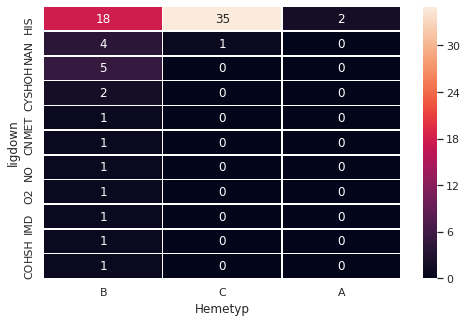

In [16]:
show1(dflg,"Hemetyp","ligdown")

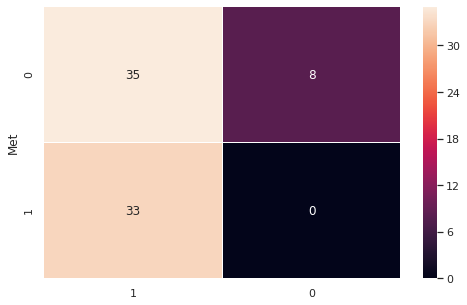

In [17]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"His","Met"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)


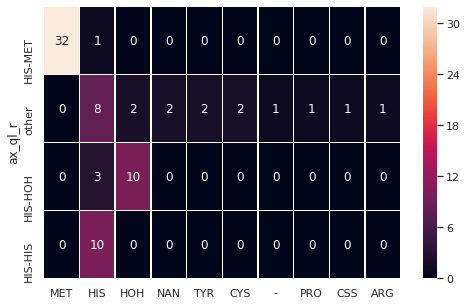

In [18]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"ligup","ax_ql_r"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)


Text(0.5, 21.5, 'H')

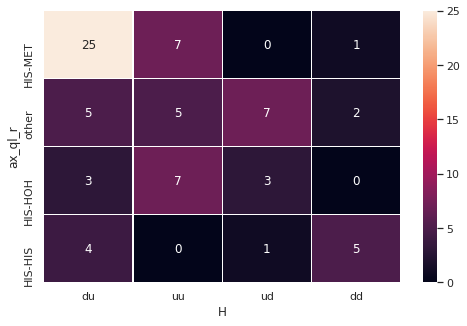

In [19]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"ud","ax_ql_r"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)
ax.set_xlabel("H")

Text(0.5, 21.5, 'H')

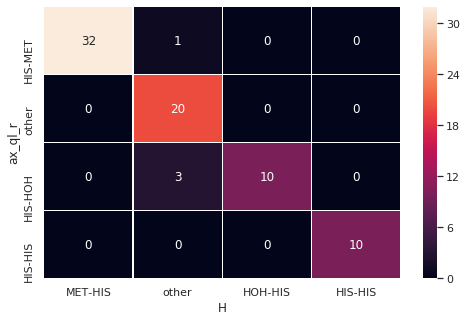

In [20]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"ax_qn_r","ax_ql_r"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)
ax.set_xlabel("H")

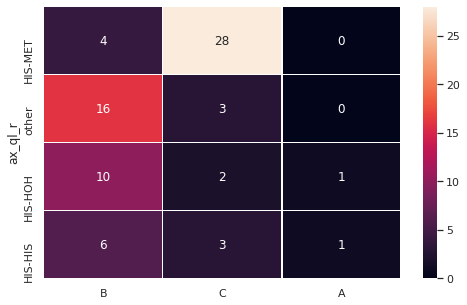

In [21]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"Hemetyp","ax_ql_r"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)


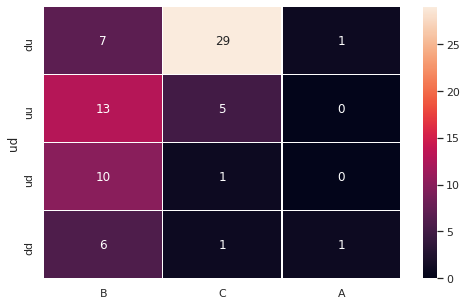

In [22]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"Hemetyp","ud"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set(font_scale=200)


(4.0, 0.0)

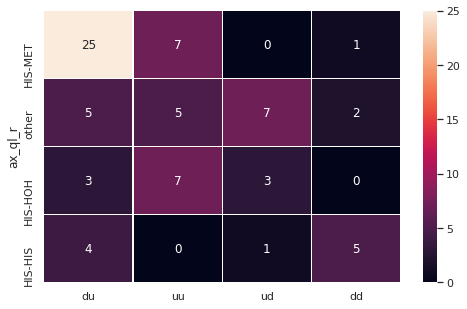

In [23]:
sns.set (rc = {'figure.figsize':(8, 5)})
ax = sns.heatmap(objecthash(dflg,"ud","ax_ql_r"),linewidths=0.5,annot= True,yticklabels=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#sns.set(font_scale=200)


In [24]:
df1.groupby(["ud","Hemetyp"]).size().reset_index().rename(columns={0:"count"})

,ud,Hemetyp,count
0,dd,A,1
1,dd,B,6
2,dd,C,1
3,du,A,1
4,du,B,7
5,du,C,29
6,ud,B,10
7,ud,C,1
8,uu,B,13
9,uu,C,5


In [25]:
sns.set(font_scale=2)


In [26]:
dflg["ud"].value_counts()

du    37
uu    19
ud    11
dd     8
Name: ud, dtype: int64

In [27]:
#sns.stripplot(data =dflg, x = "ax_qn_r", y = "HISudnmb")

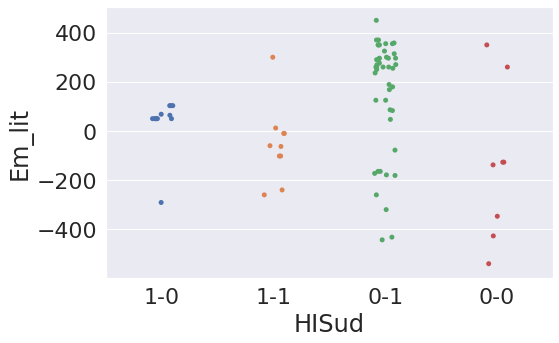

In [28]:
sns.stripplot(data =dflg, x = "HISud", y = "Em_lit")

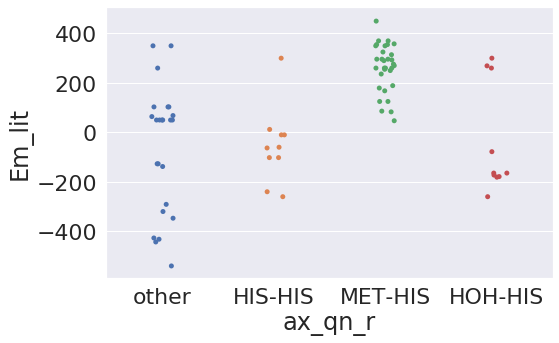

In [29]:
sns.stripplot(data =dflg, x = "ax_qn_r", y = "Em_lit")

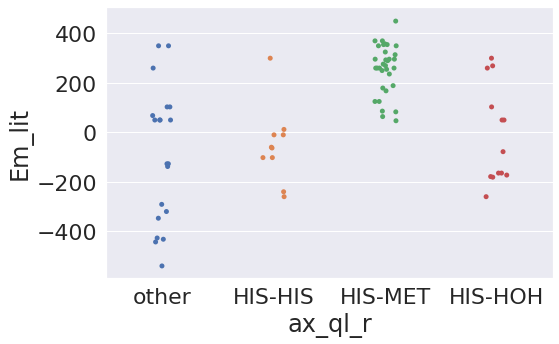

In [30]:
sns.stripplot(data =dflg, x = "ax_ql_r", y = "Em_lit")

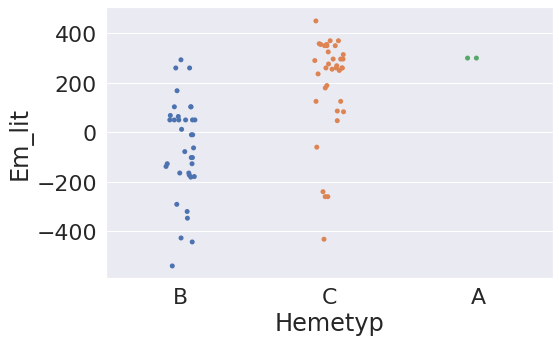

In [31]:
sns.stripplot(data =dflg, x = "Hemetyp", y = "Em_lit")

In [32]:
dflg

,ud,Hemetyp,ligup,ligdown,ax_qn,ax_ql,Em_lit,ax_qn_r,ax_ql_r,His,Met,HISud,HISudnmb
pdb,,,,,,,,,,,,,
1A6G,ud,B,HIS,CO,HIS-CO,CO-HIS,50.0,other,other,1,0,1-0,10
1A6K,ud,B,HIS,NAN,HIS-NAN,HIS-NAN,50.0,other,other,1,0,1-0,10
1A6M,ud,B,HIS,O2,HIS-O2,HIS-O2,50.0,other,other,1,0,1-0,10
1AW3,du,B,HIS,HIS,HIS-HIS,HIS-HIS,-102.0,HIS-HIS,HIS-HIS,1,0,1-1,11
1B5A,du,B,HIS,HIS,HIS-HIS,HIS-HIS,-102.0,HIS-HIS,HIS-HIS,1,0,1-1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6U97,uu,C,MET,HIS,MET-HIS,HIS-MET,179.3,MET-HIS,HIS-MET,1,1,0-1,1
2C1D_CSS,dd,C,CSS,HIS,CSS-HIS,CSS-HIS,-432.0,other,other,1,0,0-1,1
2C1D_MET,du,C,MET,HIS,MET-HIS,HIS-MET,189.0,MET-HIS,HIS-MET,1,1,0-1,1


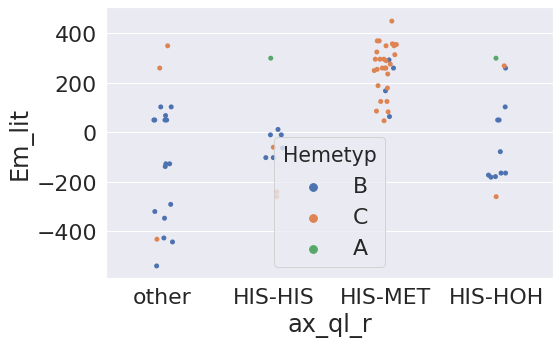

In [33]:
sns.stripplot(data =dflg, x = "ax_ql_r", y = "Em_lit", hue = "Hemetyp")

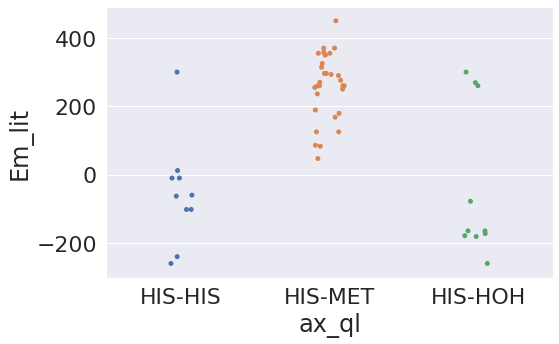

In [34]:
sns.stripplot(data =dflg[[i in  list(dflg["ax_qn"].value_counts()[:3].index) for i in dflg["ax_qn"]]], x = "ax_ql", y = "Em_lit")

In [35]:
if not all(i in df_ruffling.index for i in pdbavaible):
    print(f"ruffling fehlt{[i for i in pdbavaible if i not in df_ruffling.index]}")
    
if not all(i in _dihedral.index for i in pdbavaible):
    print(f"Dihedral fehlt{[i for i in pdbavaible if i not in _dihedral.index]}")

if not all(i in df_saddling.index for i in pdbavaible):
    print(f"saddling fehlt{[i for i in pdbavaible if i not in df_saddling.index]}")    

In [36]:
no_lit = [i for i in df_ruffling_all.index if i not in dfex_lit.index]
if len(no_lit)>0:
    raise Error


In [37]:
df_mode = pd.DataFrame({"Em_lit":[dfex_lit.loc[i]["Em_lit"] for i in modelist1]}, index = modelist1)
df_mode["type"] = dfHemetype.loc[[i for i in df_mode.index]]["type"]
df_mode["ruffling_mean"] = df_ruffling_all.mean(axis = 1)
df_mode["ruffling_max"] = df_ruffling_all.max(axis = 1)
df_mode["saddling_mean"] = df_saddling_all.mean(axis = 1)
df_mode["saddling_max"] = df_saddling_all.max(axis = 1)

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [38]:
df_modeHB = df_mode[df_mode["type"] == "Heme B" ]
df_modeNB = df_mode[df_mode["type"] != "Heme B" ]

In [39]:
df_modeHB.head()

,Em_lit,type,ruffling_mean,ruffling_max,saddling_mean,saddling_max
3CCX,-181.1,Heme B,-0.644245,17.627942,-0.525576,12.131492
6U97,179.3,Heme B,1.564556,14.284085,-1.321343,6.383501
1CCE,-127.0,Heme B,0.416999,24.739251,0.499653,24.606578
1DRM,68.0,Heme B,1.248518,16.548711,-0.591696,5.573944
2OYY,-540.0,Heme B,-0.674529,15.054889,0.204790,12.517760


In [40]:
def blindserie(columns,spin,met,pdb):
    ser={}
 #   spin= 5
  #  met = "nbo"
   # pdb = "1CCC"
    for c in columns:
        if c ==  "spin":
            ser[c] = [spin]
        elif c ==  "Ox":
            ser[c] = {1:[0],2:[1],5:[0],6:[1]}[spin]
        elif c == "method":
            ser[c] = [met]
        else:
            ser[c] = [None]
    return pd.DataFrame(ser,index=[pdb])

In [41]:
ls = {}
for spin in [1,2,5,6]:
    for met in ["nbo","chloro"]:
        df_oxmet = df_calc[df_calc["spin"] == spin]
        df_oxmet = df_oxmet[df_oxmet["method"] == met]
        #print(spin, met, [a1 for a1 in pdbavaible if a1 not in df_oxmet.index])
        for pdb in  [a1 for a1 in pdbavaible if a1 not in df_oxmet.index]:
            df_oxmet = df_oxmet.append(blindserie(df_oxmet.columns,spin,met,pdb))    
        df_oxmet = df_oxmet[[n for n in df_oxmet.columns if n not in ["spin", "method", "Ox"]]]

        #df_oxmet["diff"] = df_oxmet["lumo"] - df_oxmet["homo"]

        for c in df_oxmet.columns:
            df_oxmet = df_oxmet.rename(columns = {c:c+"_"+str(spin)+"_"+met}) 
        df_oxmet = df_oxmet.loc[pdbavaible]                                    
        ls[str(spin)+met] = df_oxmet


In [42]:
for k in ls.keys():
    print(k,ls[k].shape)

1nbo (46, 14)
1chloro (46, 14)
2nbo (46, 14)
2chloro (46, 14)
5nbo (46, 14)
5chloro (46, 14)
6nbo (46, 14)
6chloro (46, 14)


In [43]:
dfex_lit.loc[pdbavaible]
df_work = dfex_lit.loc[pdbavaible].copy()
for k in ls.keys():
    df_work = pd.concat([df_work, ls[k] ],axis=1)
#df_work = pd.concat([df_work, _dihedral.loc[pdbavaible] ],axis=1)
#df_work = pd.concat([df_work,df_pydish ],axis=1)

In [44]:
ligdict = {"mono-His" :"His", "His-Met"     :"His-Met","Bis-His"    : "His-His","Cys-His"   : "Cys-His","Tyr"         : "Tyr","His"         : "His","His-His"     : "His-His","Met-His" : "His-Met","HOH":"HOH", "IMD":"IMD",'Cys-Arg':'CYS-ARG',"Cys":"CYS"}
df_work["Ligand"] = [ligdict[i] for i in df_work["Ligand"]]

In [45]:
df_work[[not i in list(ligdict.keys()) for i in df_work["Ligand"]]]

,Elektrode,Ligand,Em_lit,e_1_nbo,edisp_1_nbo,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,diff_1_nbo,elekphil_1_nbo,...,chem_pot_6_chloro,diff_6_chloro,elekphil_6_chloro,dipole_6_chloro,qpole1_6_chloro,qpole2_6_chloro,qpole3_6_chloro,qpole4_6_chloro,polar-iso_6_chloro,polar-aniso_6_chloro
pdb,,,,,,,,,,,,,,,,,,,,,
1CPO,NHE,CYS,-138.0,-3535.310170,-72.595725,-0.17842,-0.09936,-0.13889,0.07906,0.12200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1NSI,NHE,CYS-ARG,-347.0,-3535.484611,-74.100257,-0.18785,-0.07388,-0.13087,0.11397,0.07513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# _____________________________

In [46]:
#df_work["Hemetype"].value_counts()

In [47]:
df_work["Ligand"].value_counts()

His-Met    18
His        15
His-His     7
Cys-His     1
CYS-ARG     1
HOH         1
CYS         1
Tyr         1
IMD         1
Name: Ligand, dtype: int64

In [48]:
#df_work[[df_work.loc[i]["Ligand"]  =="His-Met" and df_work.loc[i]["Hemetype"] =="Heme B" for i in df_work.index ]]

In [49]:
#df_work[[df_work.loc[i]["Ligand"]  =="His" and df_work.loc[i]["Hemetype"] =="Heme B" for i in df_work.index ]]

In [50]:
#df_work = df_work.loc[[i for i in df_work.index if not "1CRY" in i]]

In [51]:
df_work.index

Index(['1DJ1', '1QPU', '1YCC', '1EBT', '1C75', '1JP9', '1CTJ', '1MOH', '6U97',
       '1AW3', '1JP6', '2CE0', '1CXC', '2OYY', '1FLP', '1VB6', '3CCX', '1JDL',
       '2V07', '1CCC', '351C', '1CCG', '1CPO', '1A6K', '1HRC', '451C', '1GU2',
       '1CCE', '1FJ0', '1B5A', '1NSI', '1A6M', '2GSM', '1DRM', '1ES1', '1JBQ',
       '1FHF', '1EUE', '1GIW', '1F1F', '1CMQ', '1CCK', '1CRY', '4MU8', '1A6G',
       '1CMT'],
      dtype='object', name='pdb')

In [52]:
df_work["Hemetype"]=[dfHemetype.loc[i][0] for i in df_work.index]
df_work2 = df_work[[c for c in df_work.columns if True not in df_work[c].isna().value_counts().index]]

In [53]:
df_work3 = df_work2[[i for i in df_work2.columns if "edisp" not in i  and not( "e_"  in i and "dipole" not in i)     ]].copy()
df_work3["edisp"] = df_work2[[i for i in df_work2.columns if "edisp" in i]].mean(axis=1)
df_work3["e"]  = df_work2[[i for i in df_work2.columns if "e_" in i and "dipole" not in i]].mean(axis= 1)
df_work3 = df_work3[[i for i in df_work3.columns if "pole" not in i]]

In [54]:
df_work3.head()

,Elektrode,Ligand,Em_lit,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,diff_1_nbo,elekphil_1_nbo,homo_2_nbo,lumo_2_nbo,...,diff_2_nbo,elekphil_2_nbo,homo_5_nbo,lumo_5_nbo,chem_pot_5_nbo,diff_5_nbo,elekphil_5_nbo,Hemetype,edisp,e
pdb,,,,,,,,,,,,,,,,,,,,,
1DJ1,SHE,His,-172.6,-0.18873,-0.08504,-0.13689,0.10369,0.09035,-0.30489,-0.20507,...,0.09982,0.32566,-0.18376,-0.08549,-0.13462,0.09827,0.09221,Heme B,-78.632527,-3438.531792
1QPU,SHE,His-Met,168.0,-0.16396,-0.08672,-0.12534,0.07724,0.10170,-0.27119,-0.21760,...,0.05359,0.55728,-0.11382,-0.06274,-0.08828,0.05108,0.07629,Heme B,-94.642601,-3879.130537
1YCC,SHE,His-Met,290.0,-0.13454,-0.11088,-0.12271,0.02366,0.31821,-0.28847,-0.18075,...,0.10772,0.25549,-0.14182,-0.07280,-0.10731,0.06902,0.08342,Heme C,-93.566521,-3880.452928
1EBT,NHE,His,103.0,-0.18528,-0.07188,-0.12858,0.11340,0.07290,-0.30256,-0.18743,...,0.11513,0.26067,-0.17188,-0.07472,-0.12330,0.09716,0.07824,Heme B,-85.158902,-3455.528752
1C75,SHE,His-Met,47.0,-0.17273,-0.05650,-0.11461,0.11623,0.05651,-0.28204,-0.17331,...,0.10873,0.23837,-0.10133,-0.07202,-0.08668,0.02931,0.12816,Heme C,-98.072677,-3881.378586


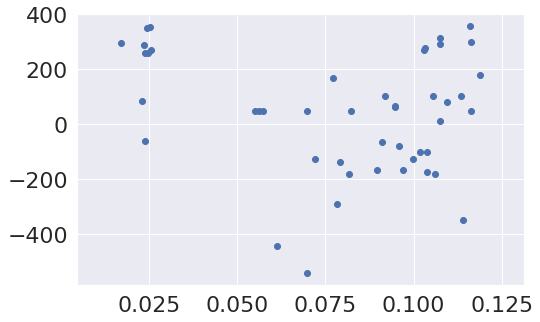

In [55]:
df = df_work3.copy()
#plt.scatter(df["chem_pot_1_nbo"],df["Em_lit"])
plt.scatter(df["diff_1_nbo"],df["Em_lit"])


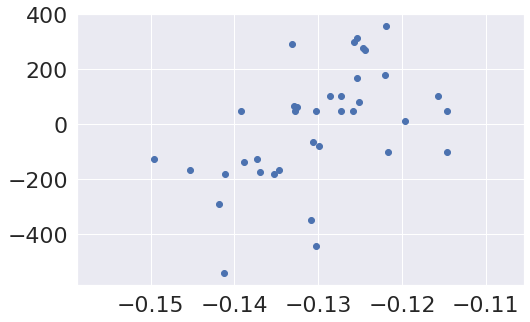

In [56]:
df = df[df["diff_1_nbo"]>0.04]
plt.scatter(df["chem_pot_1_nbo"],df["Em_lit"])


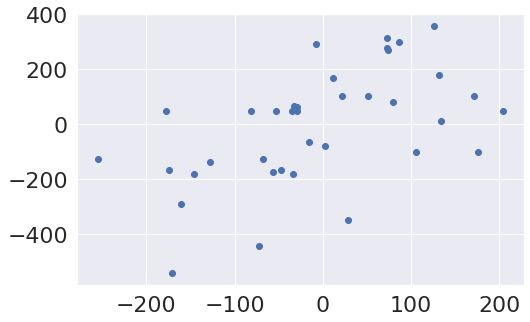

In [107]:
df = df_work3.copy()
df = df[df["diff_1_nbo"]>0.04]
X = df[["diff_1_nbo","chem_pot_1_nbo" ]]
y = df[["Em_lit"]]
X_train,X_test,y_train,y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X,y)
a,b = model.coef_[0]
intercept = model.intercept_
X_pred =[ a* dif + b*cp +intercept for dif,cp in zip(df["diff_1_nbo"], df["chem_pot_1_nbo"] )]
plt.scatter(X_pred,y)

In [108]:
df_work_distortion = df_work3.copy()
df_work_distortion["ruffling_mean"] = df_ruffling.mean(axis = 1)
df_work_distortion["ruffling_max"] = df_ruffling.max(axis = 1)
df_work_distortion["saddling_mean"] = df_saddling.mean(axis = 1)
df_work_distortion["saddling_max"] = df_saddling.max(axis = 1)
df_work_distortion_only = df_work_distortion[["Em_lit","ruffling_mean","ruffling_max","saddling_mean","saddling_max"]]


In [109]:
df_work_HemeB = df_work3[df_work3["Hemetype"] == "Heme B"]
df_work_distortion_HemeB = df_work_distortion[df_work_distortion["Hemetype"] == "Heme B"]
df_work_distortion_only_HemeB =  df_work_distortion_only[df_work3["Hemetype"] == "Heme B"]

In [110]:
df_work_His = df_work3[df_work3["Ligand"] == "His"]

# erste Graphiken

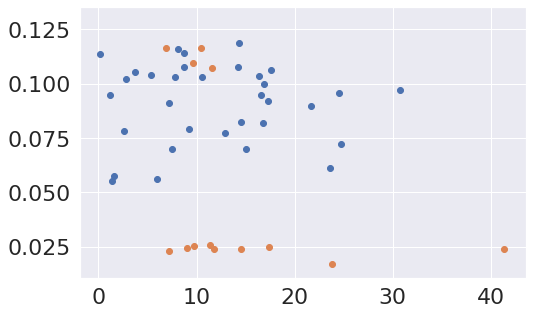

In [111]:
df = df_work_distortion[df_work_distortion["Hemetype"]=="Heme B"]
plt.scatter(df["ruffling_max"],df["diff_1_nbo"])
df = df_work_distortion[df_work_distortion["Hemetype"]!="Heme B"]
plt.scatter(df["ruffling_max"],df["diff_1_nbo"])

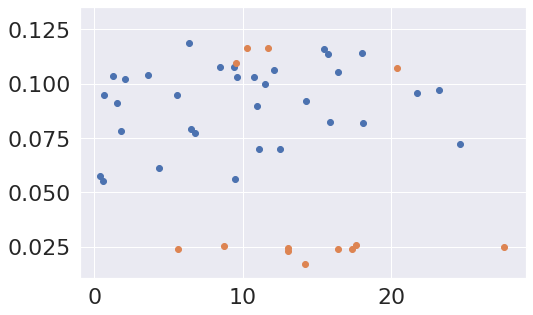

In [112]:
df = df_work_distortion[df_work_distortion["Hemetype"]=="Heme B"]
plt.scatter(df["saddling_max"],df["diff_1_nbo"])
df = df_work_distortion[df_work_distortion["Hemetype"]!="Heme B"]
plt.scatter(df["saddling_max"],df["diff_1_nbo"])


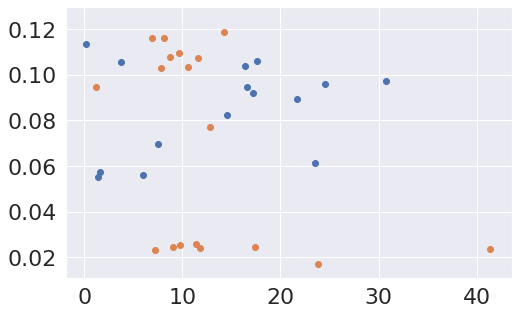

In [63]:
df = df_work_distortion[df_work_distortion["Ligand"]=="His"]
plt.scatter(df["ruffling_max"],df["diff_1_nbo"])
df = df_work_distortion[df_work_distortion["Ligand"]=="His-Met"]
plt.scatter(df["ruffling_max"],df["diff_1_nbo"])

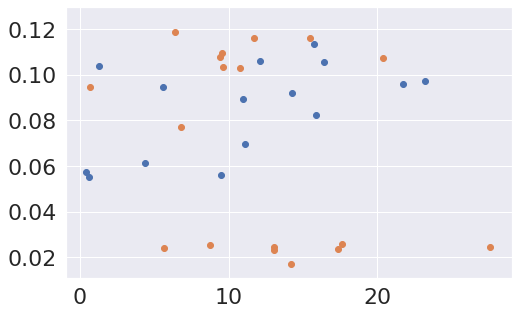

In [64]:
df = df_work_distortion[df_work_distortion["Ligand"]=="His"]
plt.scatter(df["saddling_max"],df["diff_1_nbo"])
df = df_work_distortion[df_work_distortion["Ligand"]=="His-Met"]
plt.scatter(df["saddling_max"],df["diff_1_nbo"])

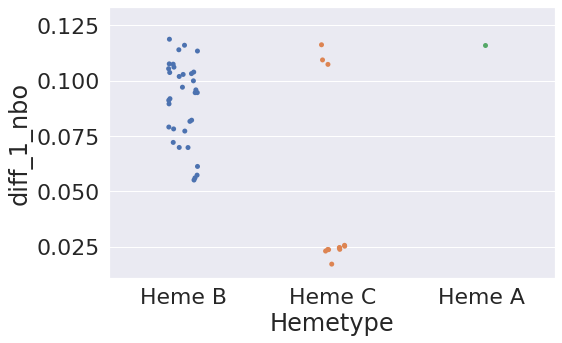

In [65]:
sns.stripplot( data =df_work_distortion, x="Hemetype",y="diff_1_nbo" )

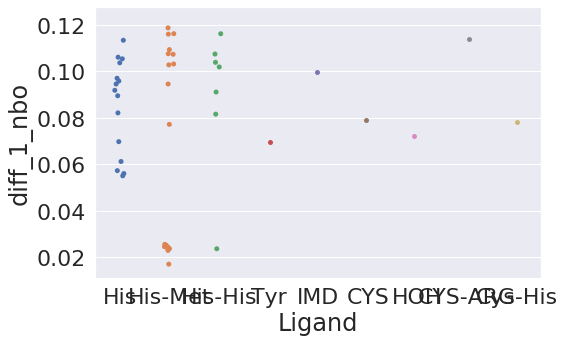

In [66]:
sns.stripplot( data =df_work_distortion, x="Ligand",y="diff_1_nbo" )


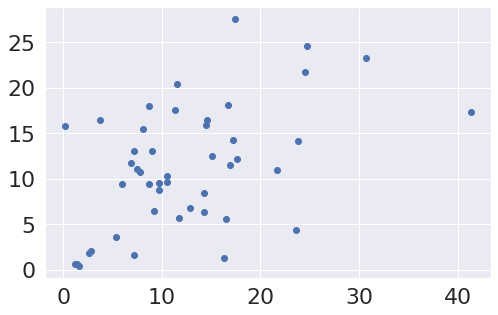

In [67]:
plt.scatter(df_work_distortion["ruffling_max"],df_work_distortion["saddling_max"])

In [68]:
[i for i in df_work2.columns if "diff" in i]

['diff_1_nbo', 'diff_2_nbo', 'diff_5_nbo']

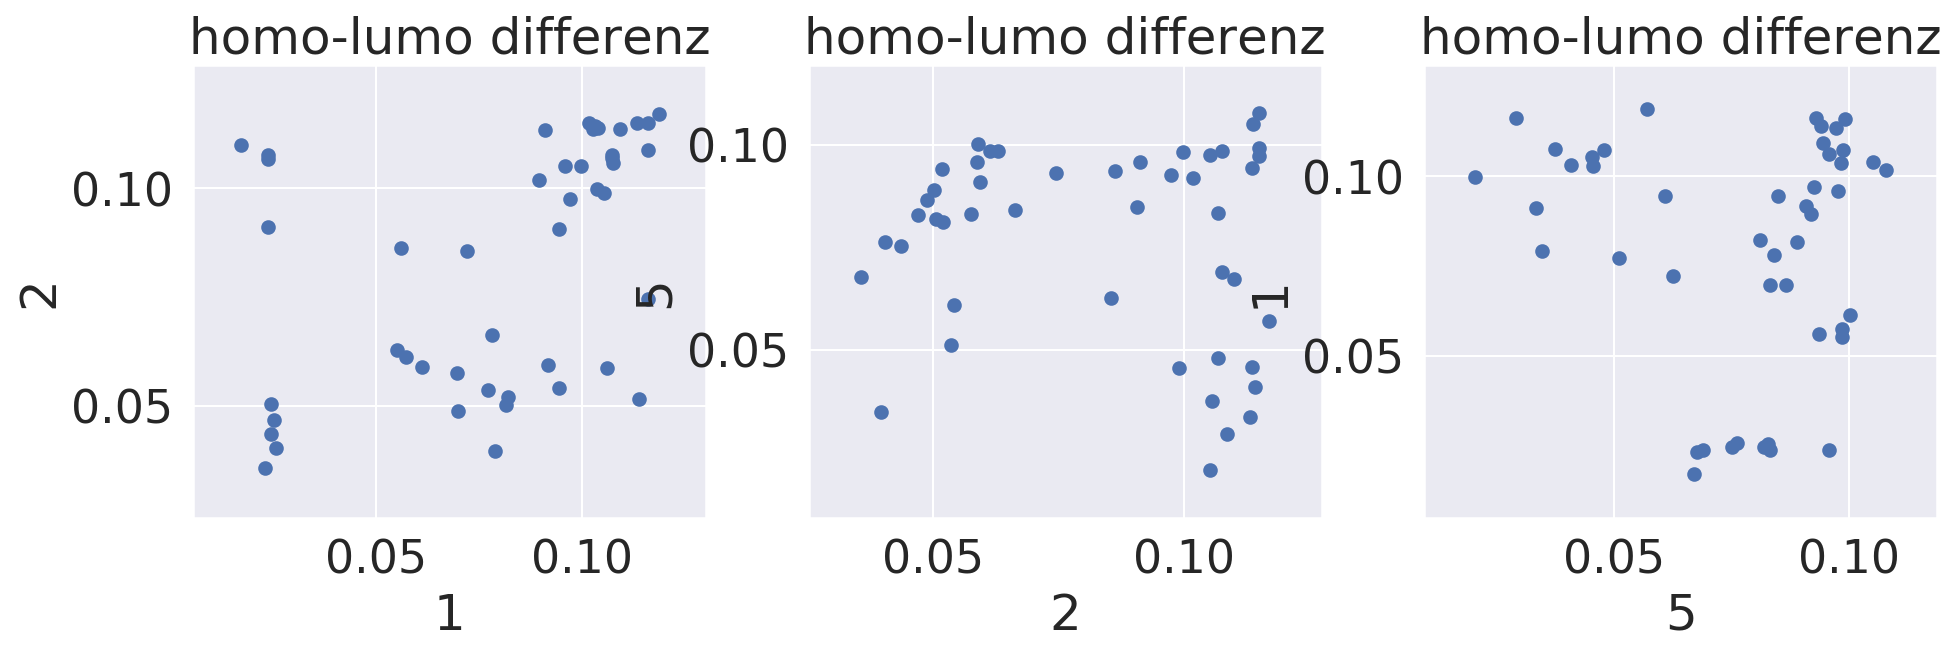

In [69]:
fig = plt.figure(dpi = 150,figsize = (15,4))
plt.subplot(131)
plt.title("homo-lumo differenz")
plt.xlabel("1")
plt.ylabel("2")
plt.scatter(df_work2["diff_1_nbo"],df_work2["diff_2_nbo"])

plt.subplot(132)
plt.title("homo-lumo differenz")

plt.xlabel("2")
plt.ylabel("5")
plt.scatter(df_work2["diff_2_nbo"],df_work2["diff_5_nbo"])

plt.subplot(133)
plt.title("homo-lumo differenz")

plt.xlabel("5")
plt.ylabel("1")
plt.scatter(df_work2["diff_5_nbo"],df_work2["diff_1_nbo"])

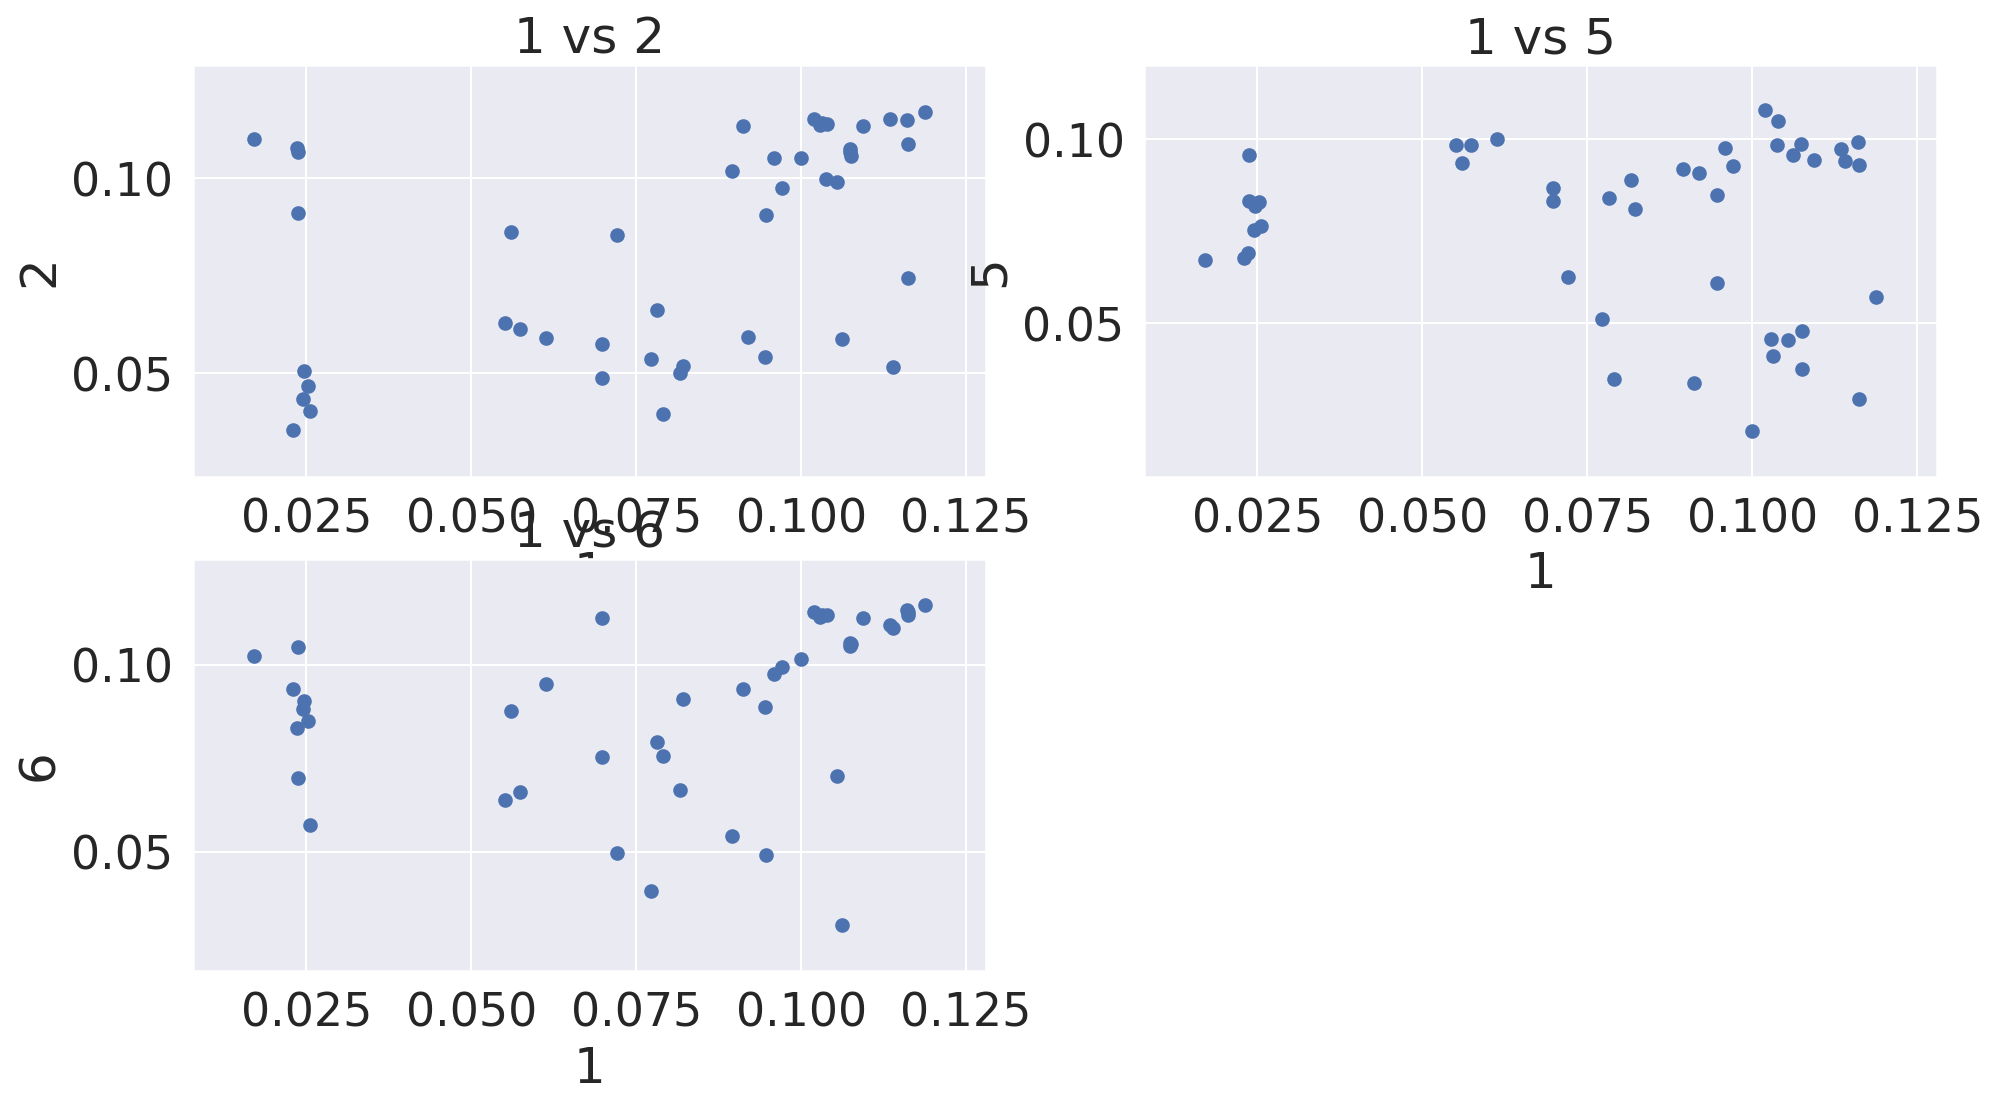

In [70]:
fig = plt.figure(dpi = 150,figsize = (15,8))

plt.subplot(221)
plt.title("1 vs 2")
plt.xlabel("1")
plt.ylabel("2")
plt.scatter(df_work2["diff_1_nbo"],df_work2["diff_2_nbo"])

plt.subplot(222)
plt.title("1 vs 5")
plt.xlabel("1")
plt.ylabel("5")
plt.scatter(df_work2["diff_1_nbo"],df_work2["diff_5_nbo"])


plt.subplot(223)
plt.title("1 vs 6")
plt.xlabel("1")
plt.ylabel("6")
plt.scatter(df_work.drop("1DJ1")["diff_1_nbo"],df_work.drop("1DJ1")["diff_6_nbo"])

In [71]:
PCA()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
def pca_show(df_work2, **kwargs):
    default_value_order=[1,2,0]
    order = kwargs.pop('order', default_value_order)    
    
    default_value_n_components=6
    num_of_componentes = kwargs.pop('num_comp', default_value_n_components) 
    if num_of_componentes>df_work2.shape[1]:
        num_of_componentes=df_work2.shape[1]
        
    
    
    best_n=3
    best_par = kwargs.pop('best_par', default_value_n_components)     
    if best_par> num_of_componentes:
        best_par== num_of_componentes
        
    default_value_whiten = False
    whiten_ = kwargs.pop('whiten', default_value_whiten)
    
    hk1,hk2,hk3=order   #x,y,c
    df_work2 = df_work2[[n for n in df_work2.columns if not n in [i for i in df_work2.dtypes[df_work2.dtypes==object].index]]]
    X = df_work2.values
    s = StandardScaler()
    X = s.fit_transform(X)
    p = PCA(n_components = num_of_componentes, whiten = whiten_)
    p.fit(X)
    X_transformed = p.transform(X)
    X_transformed_filtered = X_transformed
    #print(p.explained_variance_ratio_)
    #print("\n Sum:",sum(p.explained_variance_ratio_))
    print("noise variance: ",p.noise_variance_)
    print( "number of componentes: ", num_of_componentes) 
    #print(f"\n the best parameter of the first {best_par} components")
   # for i in range(best_par):
    #    print(p.components_[i].max())
    if(False):
        print(p.components_[0].max())
        print(p.components_[1].max())
        print(p.components_[2].max())
        plt.scatter(X_transformed_filtered[:, hk1], X_transformed_filtered[:, hk2] , c = X_transformed_filtered[:, hk3] )

        plt.xlabel(str(hk1))
        plt.xlabel(f"HK{hk1+1}")
        plt.ylabel(str(hk2))
        plt.ylabel(f"HK{hk2+1}")

        plt.title(f"Color = HK{hk3+1}")
        #plt.show()
   # p,cols  =pca_show(df_work2,num_comp=20)
    #return pd.DataFrame(p.components_,columns = cols)
    cols = list(df_work2.columns)
    #print("noise_variance_: ",p.noise_variance_)
    return pd.DataFrame(p.components_,columns = cols)

In [114]:
def best_components(df, **kwargs):
        
    default_value_n_components=6
    num_of_componentes = kwargs.pop('num_comp', default_value_n_components) 
    
    default_value_min_Em_lit = 0.1
    min_Em_lit = kwargs.pop('min_Em_lit', default_value_min_Em_lit)

    default_value_min_PC = 0.15
    min_PC = kwargs.pop('min_PC', default_value_min_PC)
    
    
    
    df  =pca_show(df,num_comp=num_of_componentes, whiten = True) #,num_comp=32)
    df_abs = df.abs()
 #   emv = list(df_abs["Em_lit"])
  #  emv.sort(reverse=True)
   # for i,v in enumerate(emv[:5]):
    #    print(v,"  ",sum(emv[:i+1]))
    bo = df[df_abs["Em_lit"]> min_Em_lit ].index

    list_of_df = []

    for b in bo:

        numname = [(np.round(v,4),i) for i,v in zip(df.loc[b].index,df.loc[b]) if abs(v)>min_PC]
        names = [i[1] for i in numname] 
        nums = [i[0] for i in numname] 
        list_of_df.append(pd.DataFrame({df.loc[b]["Em_lit"]:nums}, index= names))

    if len(list_of_df)>1:
        a = []
        for i in list_of_df:
            a = a+ list( i.index)
        a = list(set(a))


        list_of_best = [i for i in a if all([i in j.index for j in list_of_df]) ]
        Matrix = [[ld.loc[[lb]].iloc[0,0] for ld in list_of_df] for lb in list_of_best]
        #print(pd.DataFrame(Matrix, index = list_of_best, columns = [df.loc[b]["Em_lit"] for b in bo]) )
        df_bo = pd.DataFrame(Matrix, index = list_of_best, columns = [(df.loc[b]["Em_lit"]) for b in bo])
        df_bo["mean"] = df_bo.mean(axis = 1)
        list_of_df.append( df_bo)
        return list_of_df

In [115]:
df_work4 = df_work3[[n for n in df_work3.columns if not n in [i for i in df_work3.dtypes[df_work3.dtypes==object].index]]]
df_work4 = df_work_distortion[[n for n in df_work_distortion.columns if not n in [i for i in df_work_distortion.dtypes[df_work_distortion.dtypes==object].index]]]

X = df_work4.values
s = StandardScaler()
X = s.fit_transform(X)
p = PCA(n_components = 3)
p.fit(X)
X_transformed = p.transform(X)
X_transformed_filtered = X_transformed
print("noise variance: ",p.noise_variance_)


noise variance:  0.43999796705709027


In [116]:
dfp = pd.DataFrame(p.components_,columns = df_work4.columns)

In [117]:
dfp.abs().max(axis=1)

0    0.330970
1    0.431892
2    0.469853
dtype: float64

In [118]:
dfpa = dfp.abs()

In [119]:
dfpa.loc[0].nlargest(5)

edisp             0.330970
chem_pot_2_nbo    0.312183
chem_pot_5_nbo    0.311054
e                 0.304584
chem_pot_1_nbo    0.297684
Name: 0, dtype: float64

In [120]:
dfp.loc[1].nlargest(5)

elekphil_1_nbo    0.413193
homo_1_nbo        0.406319
elekphil_2_nbo    0.264466
homo_2_nbo        0.144175
ruffling_mean     0.141267
Name: 1, dtype: float64

In [121]:
dfpa.loc[1].nlargest(5)

diff_1_nbo        0.431892
elekphil_1_nbo    0.413193
homo_1_nbo        0.406319
lumo_1_nbo        0.357731
diff_2_nbo        0.275618
Name: 1, dtype: float64

In [122]:
dfpa.loc[2].nlargest(5)

elekphil_5_nbo    0.469853
diff_5_nbo        0.468302
lumo_5_nbo        0.316496
ruffling_mean     0.311179
saddling_mean     0.300187
Name: 2, dtype: float64

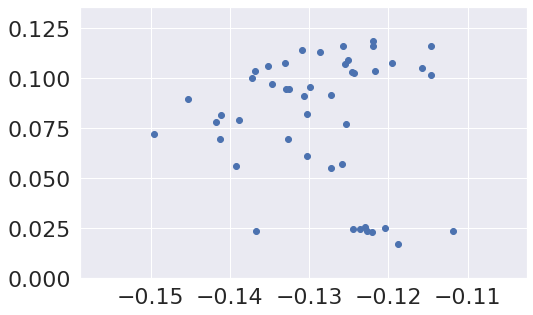

In [123]:
plt.scatter(df_work3["chem_pot_1_nbo"],df_work3["diff_1_nbo"])

In [124]:
df_work4 = df_work4[df_work4["diff_1_nbo"]>0.04]

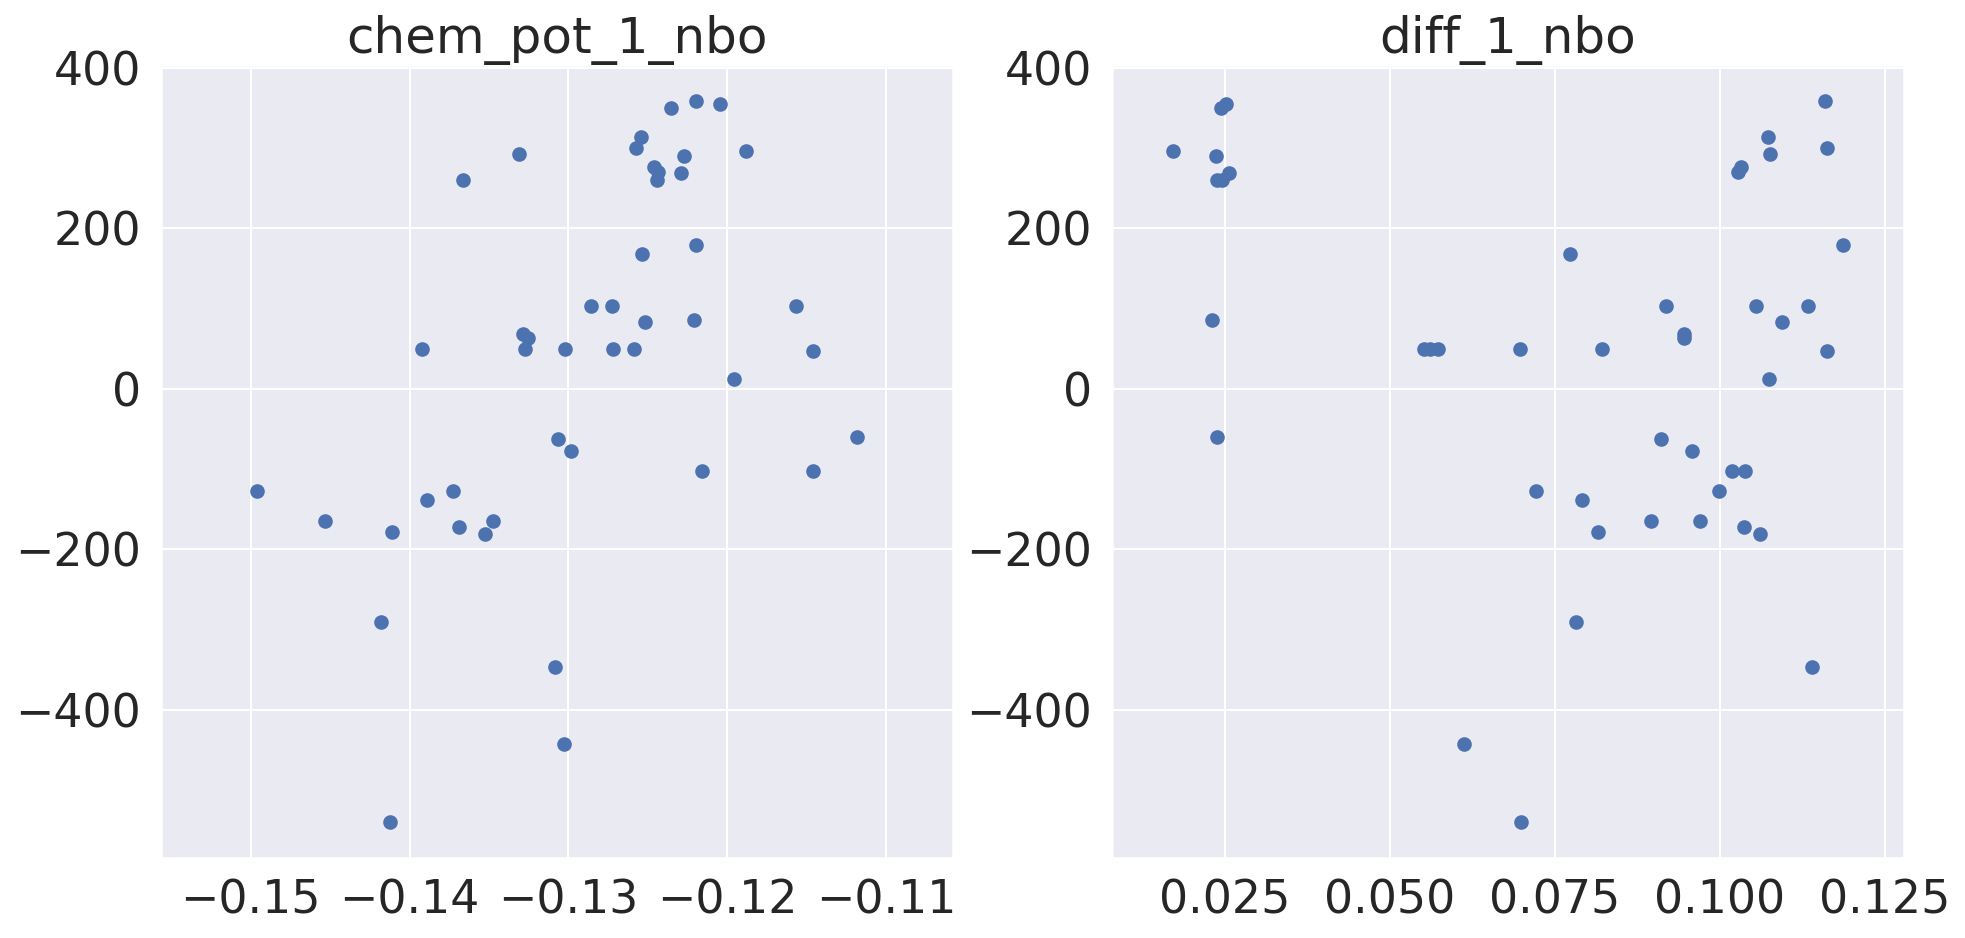

In [125]:
fig = plt.figure(dpi =150,figsize=(15,7))
plt.subplot(121)
plt.title("chem_pot_1_nbo")
plt.scatter(df_work3["chem_pot_1_nbo"],df_work3["Em_lit"])
plt.subplot(122)
plt.title("diff_1_nbo")
plt.scatter(df_work3["diff_1_nbo"],df_work3["Em_lit"])

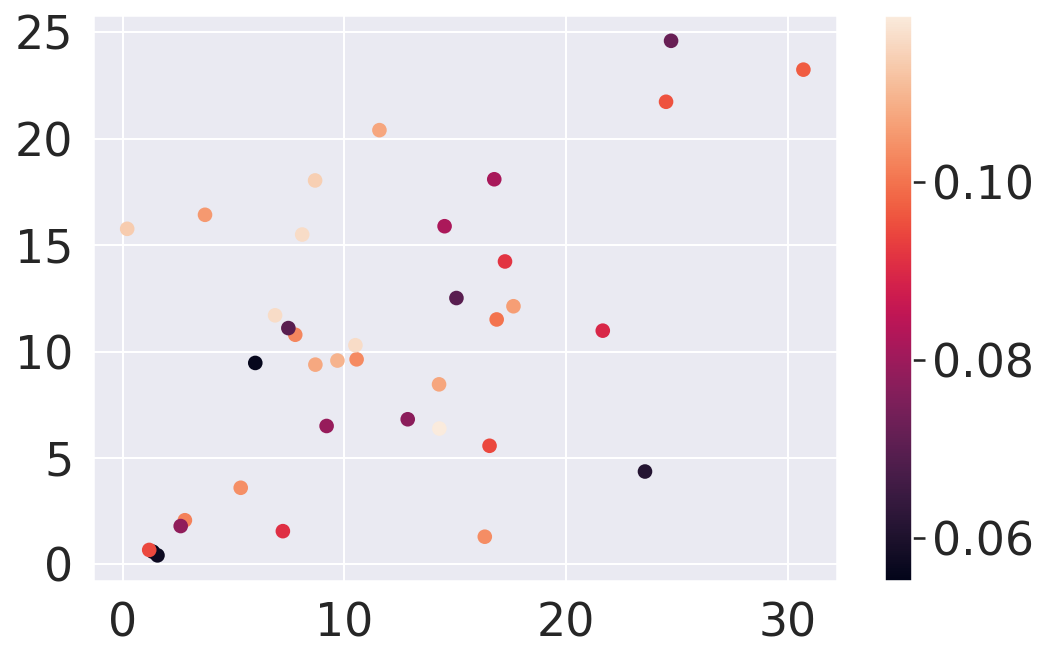

In [126]:
fig = plt.figure(dpi =150)
plt.scatter(df_work4["ruffling_max"],df_work4["saddling_max"], c = df_work4["diff_1_nbo"])
plt.colorbar()

## dwork2

In [86]:
#best_components(df_work2)[-1]

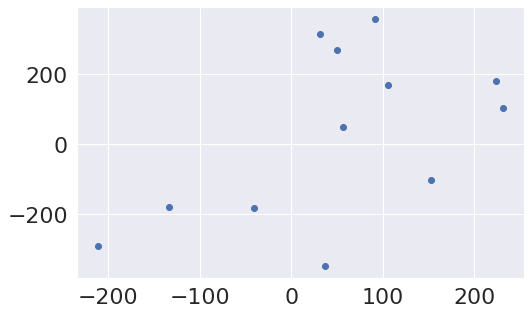

In [87]:
X = df_work2[["lumo_2_nbo", "chem_pot_1_nbo",  "homo_5_nbo", "chem_pot_2_nbo"   ]]
Y = df_work2[["Em_lit"]]
X_train,X_test,y_train,y_test =train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train,y_train)
coef = model.coef_[0]

plt.scatter(model.predict(X_test),y_test)

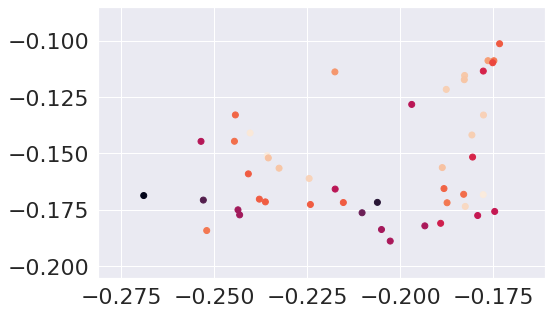

In [88]:
plt.scatter(df_work2["lumo_2_nbo"], df_work2["homo_5_nbo"],c = df_work2["Em_lit"])

## HemeB


In [89]:
best_components(df_work_HemeB, min_Em_lit=0.1,min_PC=0.1)[-1]

noise variance:  0.1009587857373091
number of componentes:  6


,0.22180855945086747,0.11897734799852894,0.488641124924554,mean
Em_lit,0.2218,0.1190,0.4886,0.276467
lumo_1_nbo,0.2935,-0.1639,-0.1723,-0.014233
elekphil_1_nbo,-0.2697,0.1566,0.2573,0.048067
diff_1_nbo,0.2286,-0.1900,-0.1843,-0.048567
diff_2_nbo,0.2589,-0.1871,0.3029,0.124900
elekphil_2_nbo,-0.2623,0.1791,-0.1917,-0.091633
homo_2_nbo,0.1420,0.1277,-0.6318,-0.120700


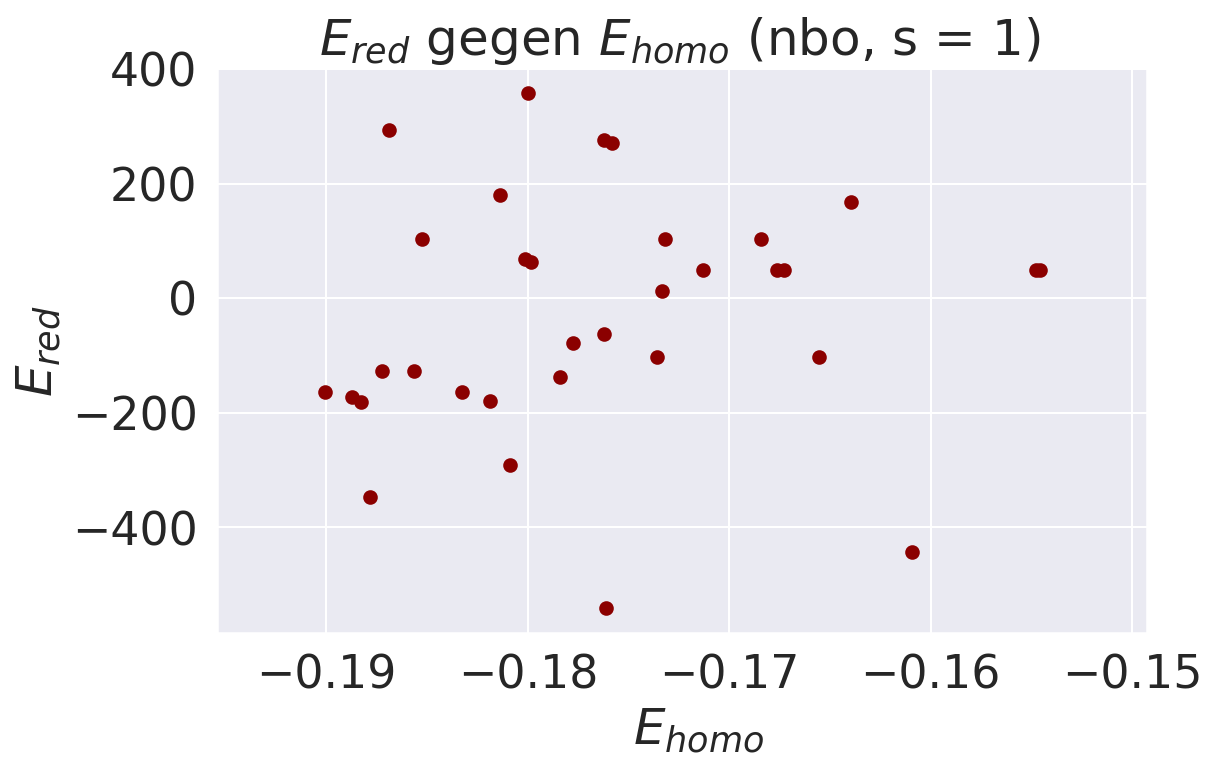

In [90]:
plt.figure(dpi=150)

plt.scatter(df_work_HemeB["homo_1_nbo"], df_work_HemeB["Em_lit"], color = "darkred")

plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("$E_{red}$ gegen $E_{homo}$ (nbo, s = 1) ")
plt.xlabel(r' $\ E_{homo}$')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_homo.png')
plt.savefig(f'{plots}all_homo.png')



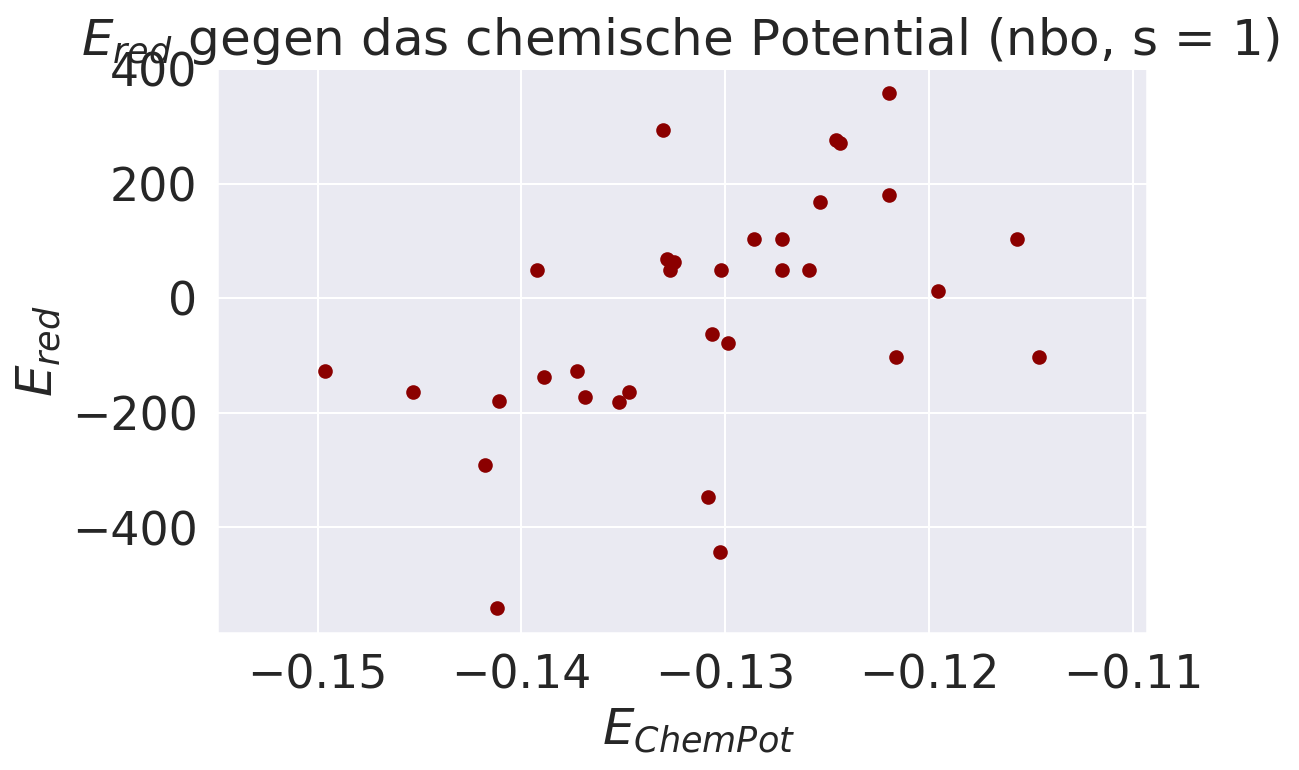

In [91]:

plt.figure(dpi=150)

plt.scatter(df_work_HemeB["chem_pot_1_nbo"], df_work_HemeB["Em_lit"], color = "darkred")

plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("$E_{red}$ gegen das chemische Potential (nbo, s = 1) ")
plt.xlabel(r' $\ E_{ChemPot}$')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}all_chemPot.png')



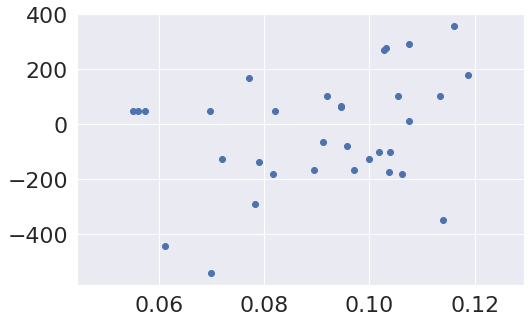

In [92]:
plt.scatter(df_work_HemeB["diff_1_nbo"], df_work_HemeB["Em_lit"])

In [93]:
df_work_HemeB_2  = df_work_HemeB[df_work_HemeB["Em_lit"]>-400]

In [94]:
best_components(df_work_HemeB_2, min_Em_lit=0.08,min_PC=0.08)[-1]

noise variance:  0.08790507705604335
number of componentes:  6


,0.2103165981370514,0.2099310534605569,0.09037819286182781,-0.4401652834508389,-0.37930038250243614,mean
Em_lit,0.2103,0.2099,0.0904,-0.4402,-0.3793,-0.06178
elekphil_1_nbo,-0.2614,0.1858,0.1231,-0.1515,-0.0849,-0.03778
diff_1_nbo,0.2180,-0.3396,-0.1081,0.1072,-0.0938,-0.04326
diff_2_nbo,0.2497,-0.3023,-0.0867,-0.2969,0.1038,-0.06648
elekphil_2_nbo,-0.2519,0.2445,0.0890,0.1850,-0.0941,0.03450
e,-0.2715,-0.1069,-0.1029,-0.2043,0.4952,-0.03808


# HIS

In [95]:
best_components(df_work_His, min_Em_lit=0.1,min_PC=0.12)[-1] 

noise variance:  0.06046973362889158
number of componentes:  6


,0.11735097881445701,-0.12865357752296747,-0.30929173506986496,-0.5251753867761678,0.1791743710181645,mean
elekphil_1_nbo,-0.1872,-0.2683,0.3454,-0.1315,0.1217,-0.02398
diff_2_nbo,0.1461,0.3491,0.1864,-0.2759,-0.1377,0.05360


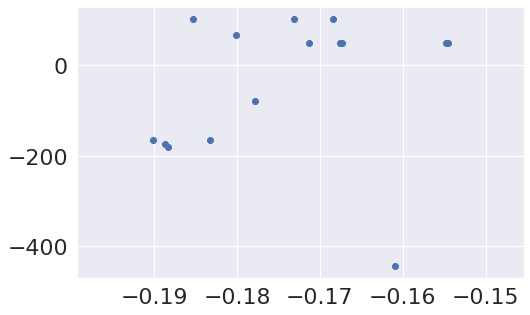

In [96]:
plt.scatter(df_work_His["homo_1_nbo"], df_work_His["Em_lit"])

## Distortion

In [97]:
best_components(df_work_distortion, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.19737331493456645
number of componentes:  6


,-0.23931089717525986,0.13972127454574046,0.20572520170969832,mean
elekphil_2_nbo,0.2275,0.2645,0.1921,0.228033
lumo_2_nbo,-0.2904,-0.2098,-0.2350,-0.245067


## Distortion HemeB

In [98]:
best_components(df_work_distortion_HemeB, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.19986894270027322
number of componentes:  6


,0.22173990194267762,0.11740806010847492,0.13227458623402827,-0.3128260208600372,mean
elekphil_2_nbo,-0.2523,0.1885,0.2789,0.1709,0.0965


## Distortion only

In [99]:
best_components(df_work_distortion_only, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.0
number of componentes:  5


,0.30995684665116885,-0.39623805730649647,0.750723844693795,-0.42426305855265883,mean
Em_lit,0.3100,-0.3962,0.7507,-0.4243,0.060050
saddling_mean,-0.5593,0.3161,0.2117,-0.4124,-0.110975
saddling_max,0.2449,0.6285,0.5260,0.5141,0.478375
ruffling_max,0.4186,0.5692,-0.2408,-0.6184,0.032150


## Distortion only Heme B

In [100]:
best_components(df_work_distortion_only_HemeB, min_Em_lit=0.2,min_PC=0.10)[-1]

noise variance:  0.0
number of componentes:  5


,-0.4424483301128191,0.7841625110367683,-0.4165685586023146,mean
Em_lit,-0.4424,0.7842,-0.4166,-0.024933
saddling_mean,0.5705,0.1133,-0.1694,0.171467
saddling_max,0.3952,0.5769,0.5551,0.509067
ruffling_mean,-0.4660,-0.1781,0.1894,-0.151567


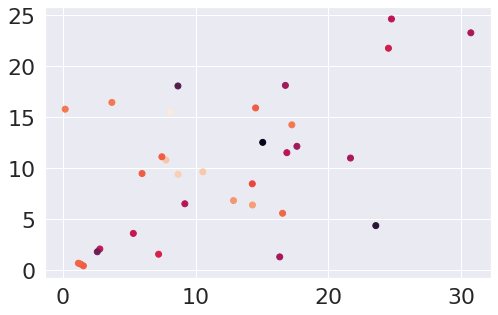

In [101]:
plt.scatter(df_work_distortion_only_HemeB["ruffling_max"], df_work_distortion_only_HemeB["saddling_max"], c = list(df_work_distortion_only_HemeB["Em_lit"]))

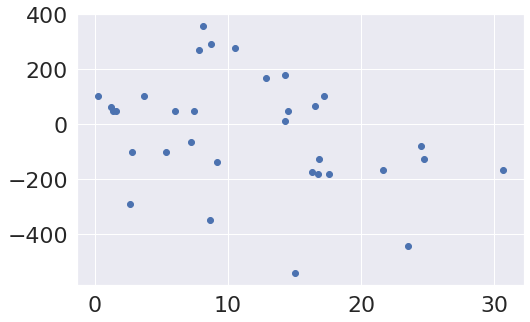

In [102]:
plt.scatter(df_work_distortion_only_HemeB["ruffling_max"] , list(df_work_distortion_only_HemeB["Em_lit"]))

In [103]:
df_work_distortion_only_HemeB

,Em_lit,ruffling_mean,ruffling_max,saddling_mean,saddling_max
pdb,,,,,
1DJ1,-172.6,1.227668,16.334332,-0.448150,1.300042
1QPU,168.0,0.768162,12.857146,-0.355552,6.820108
1EBT,103.0,-1.011155,0.198867,-0.014176,15.770743
1JP9,50.0,0.120361,1.356857,0.060551,0.593972
1CTJ,358.0,1.797600,8.096088,-0.991346,15.501774
1MOH,103.0,-9.839830,3.710566,1.737104,16.429671
6U97,179.3,1.564556,14.284085,-1.321343,6.383501
1AW3,-102.0,-1.899056,5.321410,-0.582596,3.600227
1JP6,50.0,0.205824,1.566411,0.059454,0.423901


In [104]:
#[ld.loc[[lb]].iloc[0,0] for ld in list_of_df] 

In [105]:
ld.loc[[lb]]

NameError: name 'ld' is not defined

def funktion(dataframe): 
    return datframe
        0.22
    emv 0.22
    homo 0.5
    lumo 0.4

In [ ]:
[[ld.loc[lb] for ld in list_of_df] for lb in list_of_best]

In [ ]:
[i for i in a if all([i in j.index for j in list_of_df]) ]

In [ ]:
i = "chem_pot_2_nbo" 

In [ ]:
for i in df_10pc.columns:
    if df_10pc[i].loc["sum"]>0.1:
        print(df_10pc[i].loc["sum"], i)

In [ ]:
df_work3 = df_work2[[i  for i in df_10pc.columns if df_10pc[i].loc["sum"]>0.1]]

In [ ]:
df  =pca_show(df_work3,num_comp=3)

In [ ]:
df

In [ ]:
pd.concat()

In [ ]:
dicti= {}
for a,b in zip( df_10pc.columns,[df_10pc[col].sum(axis=0) for col in df_10pc.columns]):
    dicti[a] =b
df_10pc = pd.concat([df_10pc,pd.DataFrame(dicti,index=["sum"])    ])

In [ ]:
df_10pc

In [ ]:
df  =pca_show(df_work2[["Em_lit",]],num_comp=32)

In [ ]:
for c in df_work2:
    if True  in df_work[c].isna().value_counts().index:
        print(c)

In [ ]:
df_work2.dtypes[df_work2.dtypes==object]

In [ ]:
df_work2

In [ ]:
print(df_work2.dtypes.value_counts())

In [ ]:
pca_show(df_work2[df_work2["Hemetype"]=="Heme B"],num_comp =3,order = [1,2,0],best_par=3)

In [ ]:
pca_show(df_work2[df_work2["Hemetype"]=="Heme B"])

In [ ]:
pca_show(df_work2)

In [ ]:
print(p.components_[0].max(),  df_work2.columns[np.where(p.components_[0] == p.components_[0].max())[0][0] ]  )
print(p.components_[1].max(),df_work2.columns[ np.where(p.components_[1] == p.components_[1].max())[0][0]]   )
print(p.components_[2].max(), df_work2.columns[np.where(p.components_[2] == p.components_[2].max())[0][0] ]  )
print(p.components_[3].max(), df_work2.columns[np.where(p.components_[3] == p.components_[3].max())[0][0]  ] )
print(p.components_[4].max(),df_work2.columns[ np.where(p.components_[4] == p.components_[4].max())[0][0]  ] )
print(p.components_[5].max(), df_work2.columns[np.where(p.components_[5] == p.components_[5].max())[0][0]  ] )

In [ ]:
df_work2.columns[133]

In [ ]:
######df_calc

In [ ]:
_dihedral

Read in csv-files and change axes so that the PDB entries are a) non duplicate and b) the index column of the table so that we can clearly identify each heme by it's originating protein structure

In [ ]:
dfex_lit

In [ ]:
pd.read_csv("tables/Hemetypes.csv")

In [ ]:
#_4spin = pd.read_csv("4spin.csv")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_nbo_singulet = pd.read_csv("nbo_singulet.csv")
_4spin = _4spin.drop("Unnamed: 0", axis=1)
_4spin = _4spin.set_index("PDB")
spin = _4spin
_dihedral = _dihedral.rename(columns={"index": "PDB"})
_dihedral["PDB"] = _dihedral["PDB"]#.str.upper()
_dihedral = _dihedral.set_index("PDB")
dihe = _dihedral
_nbo_singulet = _nbo_singulet.drop("Unnamed: 0", axis=1)
_nbo_singulet["PDB"] = _nbo_singulet["PDB"].str.upper()
_nbo_singulet = _nbo_singulet.set_index("PDB")
nbo = _nbo_singulet

Compare column names as a list to see which information is redundant, and can be used to potentially join the tables. Compare shapes of the resulting subtables with only the information from the inner join (columns that both tables contain) and add the lines that are omitted from the original tables because the calculations did compute succesfully in chloroform solution. 

In [ ]:
nbo_cols = list(nbo.columns)
dihe_cols = list(dihe.columns)
spin_cols = list(spin.columns)
insec1 = list(set(nbo_cols).intersection(spin_cols))
sub_nbo, sub_spin, i = pd.DataFrame(), pd.DataFrame(), 0
for col_name in insec1:
    sub_nbo.insert(loc=i, column=col_name, value=nbo[col_name])
    sub_spin.insert(loc=i, column=col_name, value=spin[col_name])
    i+=1
#print("sub_nbo shape: "+str(sub_nbo.shape))
#print("sub_spin shape: "+str(sub_spin.shape))
#here, add the lines that are missing, so both tables have the same format

In [ ]:
sub_nbo

Have a look at the distributions of the measured dihedral angles in the porphyrin ring

In [ ]:
#print("  \n\n\n\n\n ")
print("          {}---{}					".format("C3_NW","C3_NO"))
print("            /      \ ")
print("        {}      {}					".format("C1_NW","C1_NO"))
print("       /    \      /  \ ")
print("   {}        {}     {}					".format("WC2N","N_N","NC2O"))
print("     |          |        | 					")
print("  __{}       |        {}_					".format("C1_WN","C1_ON"))
print("{}    \      |      /      {}					".format("C3_WN","C3_ON"))
print("|        {}----{}----{}      |  					".format("NW","Fe","NO"))
print("{}__  /      |      \    _{}					".format("C3_WS","C3_OS"))
print("    {}       |       {}					".format("C1_WS","C1_OS"))
print("     |          |         | 					")
print("     {}      {}      {}					".format("SC2W","N_S","OC2S"))
print("       \      /   \    /  ")
print("        {}       {}					".format("C1_SW","C1_SO"))
print("            \     /")
print("          {}---{}						".format("C3_SW","C3_SO"))

In [ ]:
saddling = [["C1_SW", "N_S" ,"N_N","C1_NW"],["C1_SO", "N_S","N_N", "C1_NO"],["C1_WS", "NW", "NO" ,"C1_OS"],["C1_WN", "NW", "NO" ,"C1_ON"]]
ruffling = [["C3_SW", "C1_SW", "C1_WS", "C3_WS"],["C3_SO", "C1_SO", "C1_OS", "C3_OS"],["C3_WN", "C1_WN", "C1_NW", "C3_NW"],["C3_NO", "C1_NO", "C1_ON", "C3_ON"]]

In [ ]:
if not True or not True:
    print("i")

In [ ]:
dihe.head()
#dihe.max()
#dihe.min()
#dihe

In [ ]:
class angles():
    def __init__(self):
        return

    def transform_angles(angle):
        """
        angles.transform_angles transforms all angles lower than -30 by adding 360°.
        """
        if angle <= -30.0:
            angle=360+angle
        return angle

    def histplot_all(data):
        """ 
        angles.histplot_all() plots all columns of a pd.DataFrame containing e.g. dihedral angles into one plot, adds the kde. Beforehand, angles are transformed 
        with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        dihe_trans = dihe.applymap(angles.transform_angles)
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data=dihe_trans, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angles")
        ax.set_xlabel(f"Angle [°]")
        fig.savefig(f"heme/histplot_dihe_all.png")
        return

    def histplot(data, column_name):
        """ 
        angles.histplot() plots a single column of a pd.DataFrame containing angles as a histogram. 
        """
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angle {column_name}")
        ax.set_xlabel(f"{column_name} [°]")
        fig.savefig(f"heme/histplot_{column_name}.png")
        return

    def single_histplots(data):
        """ 
        angles.single_histplots() loops over all columns in the pd.DataFrame given, creating histograms with angles.histplot(). Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        for column in data.columns:
            angles.histplot(data=data[column], column_name=column)
        return

    def histplot_grid(data):
        """ 
        angles.histplot_grid() takes a pd.DataFrame and creates a plot of all the columns, and arranges them in a grid. Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        #nrows, ncols = (data.shape[1]//3)+1, 3
        #fig = plt.subplots(ncols=ncols, nrows=nrows)
        plt.figure(figsize=(15, 12))
        plt.subplots_adjust(hspace=0.7)
        plt.suptitle("Dihedral Angles of Heme-Porphyrin Ring in Protein Structures", fontsize=16, y=0.95)

        # loop through the length of tickers and keep track of index
        for n, column in enumerate(dihe.columns):
            # add a new subplot iteratively
            ax = plt.subplot(5, 3, n + 1)

            # filter df and plot ticker on the new subplot axis
            dihe[column].hist(ax=ax, bins=60)

            # chart formatting
            ax.set_title(column.upper())
            ax.set_xlim([-20, 220])
            #ax.get_legend().remove()
            ax.set_xlabel("Angle [°]")
            ax.set_ylabel("Count")
        plt.savefig(f"heme/histplot_grid.png")
        return

In [ ]:
#angles.histplot_all(data=dihe)
#angles.single_histplots(data=dihe)
angles.histplot_grid(data=dihe)

In [ ]:
#dist = pd.DataFrame(np.ones([37,14]))
#fig = plt.figure()
#ax = fig.add_subplot(projection="polar")
#c = ax.scatter(dihe.applymap(angles.transform_angles), dist)
#This makes no sense, why are all the data points shown somewhere they're not?